In [1]:
import os
from pathlib import Path
import anndata as an
import numpy as np
import pandas as pd
import deside
import matplotlib.pyplot as plt
import seaborn as sns
from deside.utility import check_dir, set_fig_style, print_df, get_ccc, non_log2log_cpm, non_log2cpm
from deside.decon_cf import DeSide
from deside.utility.read_file import read_gene_set, ReadH5AD
set_fig_style(font_family='Arial', font_size=8)

2024-06-14 15:40:42.133273: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## DeSide (sigmoid + pathway)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset pdac_peng_02 (DiNonCancer+PDAC)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset hnscc_puram_03 (DiNonCancer+HNSCC)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset luad_kim_05 (DiNonCancer+LUAD)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset prad_chang_08 (DiNonCancer+PRAD)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset hcc_sun_10 (DiNonCancer+HCC)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset gbm_abdelfattah_12 (DiNonCancer+GBM)
<!-- - Ascites -->

In [2]:
cancer_type = 'pdac'
ccc_deside_pdac = pd.read_csv(f'../results/whole_workflow_20240524_single_cancer_type/DeSide_DiNonCancer_{cancer_type}_ds_sigmoid/Mixed_N100K_segment_without_filtering_{cancer_type}/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_pdac.index.name = 'cancer_type'
ccc_deside_pdac['model'] = f'Pathway_{cancer_type.upper()}'
ccc_deside_pdac.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.689301,0.235861,0.209305,Pathway_PDAC
BLCA,0.674780,0.113342,0.671796,Pathway_PDAC


In [3]:
cancer_type = 'hnscc'
ccc_deside_hnscc = pd.read_csv(f'../results/whole_workflow_20240524_single_cancer_type/DeSide_DiNonCancer_{cancer_type}_ds_sigmoid/Mixed_N100K_segment_without_filtering_{cancer_type}/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_hnscc.index.name = 'cancer_type'
ccc_deside_hnscc['model'] = f'Pathway_{cancer_type.upper()}'
ccc_deside_hnscc.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.813324,0.195484,0.346087,Pathway_HNSCC
BLCA,0.693393,0.129378,0.645159,Pathway_HNSCC


In [4]:
ccc_deside_luad = pd.read_csv('../results/whole_workflow_20240519_11ds_only_luad_cancer_cells/DeSide_01_new_ds_subtypes_all_range_sigmoid_pathway/Mixed_N100K_segment_without_filtering_luad/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_luad.index.name = 'cancer_type'
ccc_deside_luad['model'] = 'Pathway_LUAD'
ccc_deside_luad.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.743575,0.15257,0.465105,Pathway_LUAD
BLCA,0.719596,0.11015,0.714279,Pathway_LUAD


In [5]:
cancer_type = 'prad'
ccc_deside_prad = pd.read_csv(f'../results/whole_workflow_20240524_single_cancer_type/DeSide_DiNonCancer_{cancer_type}_ds_sigmoid/Mixed_N100K_segment_without_filtering_{cancer_type}/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_prad.index.name = 'cancer_type'
ccc_deside_prad['model'] = f'Pathway_{cancer_type.upper()}'
ccc_deside_prad.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.828446,0.219156,0.334048,Pathway_PRAD
BLCA,0.693792,0.136107,0.636962,Pathway_PRAD


In [6]:
cancer_type = 'hcc'
ccc_deside_hcc = pd.read_csv(f'../results/whole_workflow_20240524_single_cancer_type/DeSide_DiNonCancer_{cancer_type}_ds_sigmoid/Mixed_N100K_segment_without_filtering_{cancer_type}/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_hcc.index.name = 'cancer_type'
ccc_deside_hcc['model'] = f'Pathway_{cancer_type.upper()}'
ccc_deside_hcc.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.823895,0.170637,0.373646,Pathway_HCC
BLCA,0.696461,0.184886,0.477249,Pathway_HCC


In [7]:
cancer_type = 'gbm'
ccc_deside_gbm = pd.read_csv(f'../results/whole_workflow_20240524_single_cancer_type/DeSide_DiNonCancer_{cancer_type}_ds_sigmoid/Mixed_N100K_segment_without_filtering_{cancer_type}/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_gbm.index.name = 'cancer_type'
ccc_deside_gbm['model'] = f'Pathway_{cancer_type.upper()}'
ccc_deside_gbm.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.859805,0.146871,0.481719,Pathway_GBM
BLCA,0.712604,0.147350,0.588270,Pathway_GBM


## DeSide (sigmoid without pathway)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset pdac_peng_02 (DiNonCancer+PDAC)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset hnscc_puram_03 (DiNonCancer+HNSCC)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset luad_kim_05 (DiNonCancer+LUAD)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset prad_chang_08 (DiNonCancer+PRAD)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset hcc_sun_10 (DiNonCancer+HCC)
- Model trained by the dataset containing diverse non-cancer cells and cancer cells only in dataset gbm_abdelfattah_12 (DiNonCancer+GBM)
<!-- - Ascites -->

In [9]:
cancer_type = 'pdac'
ll_ac = 'sigmoid'
ccc_deside_np_pdac = pd.read_csv(f'../results/whole_workflow_20240524_single_cancer_type/DeSide_DiNonCancer_{cancer_type}_ds_{ll_ac}_nopathway/Mixed_N100K_segment_without_filtering_{cancer_type}/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_np_pdac.index.name = 'cancer_type'
ccc_deside_np_pdac['model'] = f'NoPathway_{cancer_type.upper()}'
ccc_deside_np_pdac.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.368597,0.572169,0.020715,NoPathway_PDAC
BLCA,0.640467,0.218618,0.373054,NoPathway_PDAC


In [10]:
cancer_type = 'hnscc'
ll_ac = 'sigmoid'
ccc_deside_np_hnscc = pd.read_csv(f'../results/whole_workflow_20240524_single_cancer_type/DeSide_DiNonCancer_{cancer_type}_ds_{ll_ac}_nopathway/Mixed_N100K_segment_without_filtering_{cancer_type}/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_np_hnscc.index.name = 'cancer_type'
ccc_deside_np_hnscc['model'] = f'NoPathway_{cancer_type.upper()}'
ccc_deside_np_hnscc.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.507132,0.520556,0.041686,NoPathway_HNSCC
BLCA,0.607664,0.237446,0.342005,NoPathway_HNSCC


In [11]:
ccc_deside_np_luad = pd.read_csv('../results/whole_workflow_20240519_11ds_only_luad_cancer_cells/DeSide_04_new_ds_subtypes_all_range_sigmoid_no_pathway/Mixed_N100K_segment_without_filtering_luad/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_np_luad.index.name = 'cancer_type'
ccc_deside_np_luad['model'] = 'NoPathway_LUAD'
ccc_deside_np_luad.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.32392,0.582270,0.020082,NoPathway_LUAD
BLCA,0.67893,0.208326,0.442698,NoPathway_LUAD


In [12]:
cancer_type = 'prad'
ll_ac = 'sigmoid'
ccc_deside_np_prad = pd.read_csv(f'../results/whole_workflow_20240524_single_cancer_type/DeSide_DiNonCancer_{cancer_type}_ds_{ll_ac}_nopathway/Mixed_N100K_segment_without_filtering_{cancer_type}/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_np_prad.index.name = 'cancer_type'
ccc_deside_np_prad['model'] = f'NoPathway_{cancer_type.upper()}'
ccc_deside_np_prad.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.638496,0.611218,0.032600,NoPathway_PRAD
BLCA,0.670313,0.328456,0.225457,NoPathway_PRAD


In [13]:
cancer_type = 'hcc'
ll_ac = 'sigmoid'
ccc_deside_np_hcc = pd.read_csv(f'../results/whole_workflow_20240524_single_cancer_type/DeSide_DiNonCancer_{cancer_type}_ds_{ll_ac}_nopathway/Mixed_N100K_segment_without_filtering_{cancer_type}/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_np_hcc.index.name = 'cancer_type'
ccc_deside_np_hcc['model'] = f'NoPathway_{cancer_type.upper()}'
ccc_deside_np_hcc.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.455349,0.800809,0.009643,NoPathway_HCC
BLCA,0.458162,0.642147,0.017754,NoPathway_HCC


In [14]:
cancer_type = 'gbm'
ll_ac = 'sigmoid'
ccc_deside_np_gbm = pd.read_csv(f'../results/whole_workflow_20240524_single_cancer_type/DeSide_DiNonCancer_{cancer_type}_ds_{ll_ac}_nopathway/Mixed_N100K_segment_without_filtering_{cancer_type}/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-deside-metrics.csv', index_col=0)
ccc_deside_np_gbm.index.name = 'cancer_type'
ccc_deside_np_gbm['model'] = f'NoPathway_{cancer_type.upper()}'
ccc_deside_np_gbm.head(2)

,corr,rmse,ccc,model
cancer_type,,,,
ACC,0.528797,0.616496,0.023919,NoPathway_GBM
BLCA,0.401697,0.624850,0.019420,NoPathway_GBM


## Comparison

In [16]:
ccc_all = pd.concat([ccc_deside_pdac, ccc_deside_np_pdac, ccc_deside_hnscc, ccc_deside_np_hnscc,
                     ccc_deside_luad, ccc_deside_np_luad, ccc_deside_prad,  ccc_deside_np_prad,
                     ccc_deside_hcc,  ccc_deside_np_hcc,  ccc_deside_gbm,   ccc_deside_np_gbm])
ccc_all.reset_index(inplace=True)
ccc_all.sort_values(by='ccc', ascending=False, inplace=True)
print(ccc_all.shape)
ccc_all.head(2)

(216, 5)


,cancer_type,corr,rmse,ccc,model
49,LUSC,0.781959,0.096118,0.778250,Pathway_HNSCC
79,KICH,0.873632,0.082134,0.744428,Pathway_LUAD


In [18]:
models = ccc_all['model'].unique()
sorted(models)

['NoPathway_GBM',
 'NoPathway_HCC',
 'NoPathway_HNSCC',
 'NoPathway_LUAD',
 'NoPathway_PDAC',
 'NoPathway_PRAD',
 'Pathway_GBM',
 'Pathway_HCC',
 'Pathway_HNSCC',
 'Pathway_LUAD',
 'Pathway_PDAC',
 'Pathway_PRAD']

In [19]:
color_2 = [sns.color_palette("tab20")[i] for i in range(2)]
sns.color_palette(color_2)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274)]

In [20]:
fig_dir = './results/reviewer2_q1/'
check_dir(fig_dir)
cancer_types = ccc_all['cancer_type'].unique()

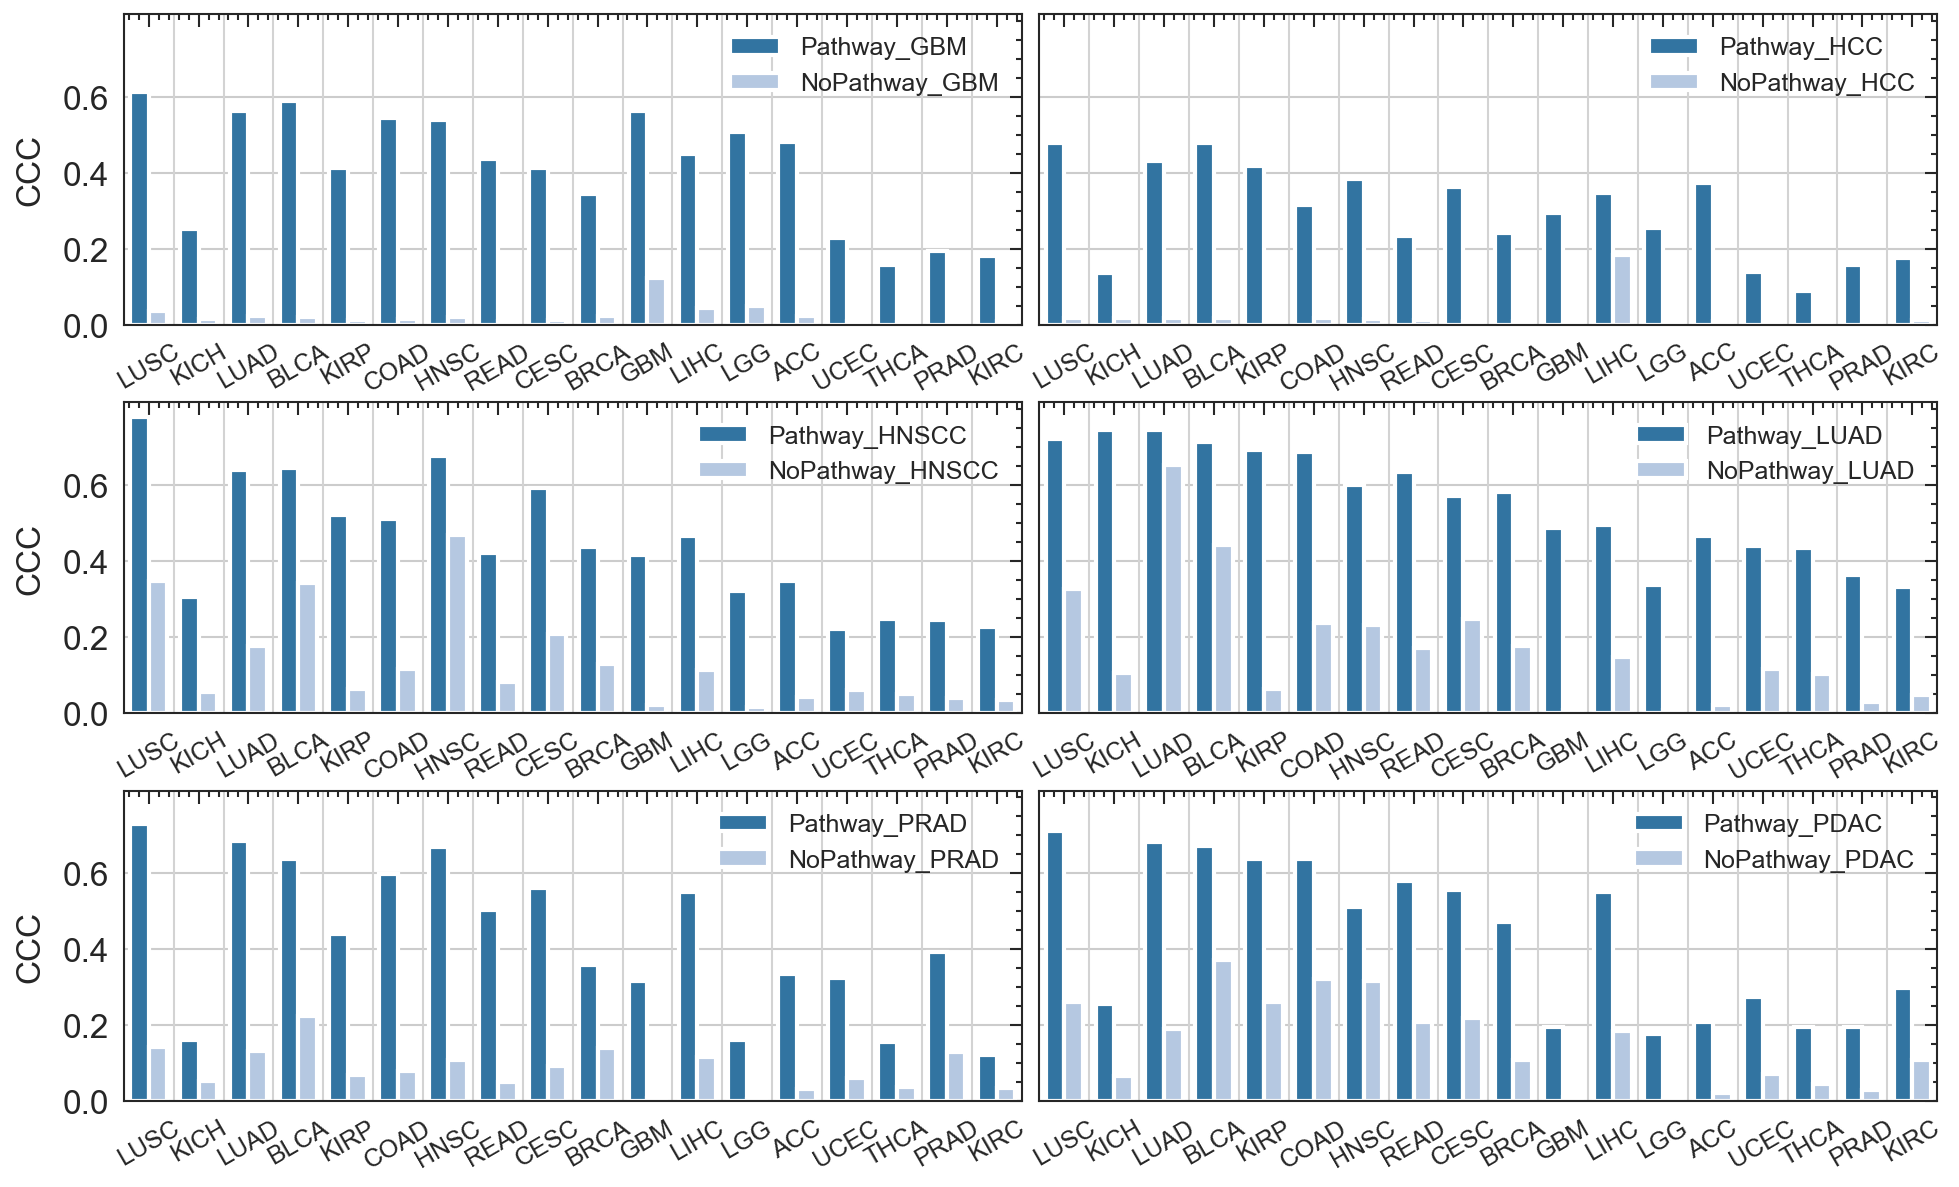

In [22]:
fig, axes = plt.subplots(figsize=(7.8, 4.8), nrows=3, ncols=2, sharey=True)
plt.subplots_adjust(# left=0.1, bottom=0.1,  right=0.9,  top=0.9, 
                    wspace=0.02, 
                    hspace=0.25)
width = 0.75
m1 = ['Pathway_GBM', 'NoPathway_GBM']
g1 = sns.barplot(data=ccc_all.loc[ccc_all['model'].isin(m1), :].copy(), x='cancer_type', y='ccc', hue='model', ax=axes[0, 0], width=width, order=cancer_types, palette=color_2, 
                 hue_order=m1)
g1.legend(fontsize=6, loc='upper right')
# g1.legend([],[], frameon=False)
# sns.move_legend(g1, "upper left", bbox_to_anchor=(0, 1.17), ncol=3, title=None, frameon=False, fontsize=6, borderpad=0, handletextpad=0)
axes[0, 0].grid(axis='y')
for _x in range(18):
    axes[0, 0].axvline(_x - 0.5, color='lightgray', linewidth=0.5)
for item in g1.get_xticklabels():
    item.set_rotation(30)
    item.set_fontsize(6)
# ax.legend(fontsize=6, loc='best')
axes[0, 0].set_yticks([0.0, 0.2, 0.4, 0.6])
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('CCC')

m2 = ['Pathway_HCC', 'NoPathway_HCC']
g2 = sns.barplot(data=ccc_all.loc[ccc_all['model'].isin(m2), :].copy(), x='cancer_type', y='ccc', hue='model', ax=axes[0, 1], width=width, order=cancer_types, palette=color_2, 
                 hue_order=m2)
g2.legend(fontsize=6)
# g2.legend([],[], frameon=False)
# sns.move_legend(g2, "upper left", bbox_to_anchor=(0, 1.17), ncol=3, title=None, frameon=False, fontsize=6, borderpad=0, handletextpad=0)
axes[0, 1].grid(axis='y')
for _x in range(18):
    axes[0, 1].axvline(_x - 0.5, color='lightgray', linewidth=0.5)
for item in g2.get_xticklabels():
    item.set_rotation(30)
    item.set_fontsize(6)
# ax.legend(fontsize=6, loc='best')
axes[0, 1].set_yticks([0.0, 0.2, 0.4, 0.6])
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')

m3 = ['Pathway_HNSCC', 'NoPathway_HNSCC']
g3 = sns.barplot(data=ccc_all.loc[ccc_all['model'].isin(m3), :].copy(), x='cancer_type', y='ccc', hue='model', ax=axes[1, 0], width=width, order=cancer_types, palette=color_2, 
                 hue_order=m3)
g3.legend(fontsize=6)
# g1.legend([],[], frameon=False)
# sns.move_legend(g1, "upper left", bbox_to_anchor=(0, 1.17), ncol=3, title=None, frameon=False, fontsize=6, borderpad=0, handletextpad=0)
axes[1, 0].grid(axis='y')
for _x in range(18):
    axes[1, 0].axvline(_x - 0.5, color='lightgray', linewidth=0.5)
for item in g3.get_xticklabels():
    item.set_rotation(30)
    item.set_fontsize(6)
# ax.legend(fontsize=6, loc='best')
axes[1, 0].set_yticks([0.0, 0.2, 0.4, 0.6])
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('CCC')

m4 = ['Pathway_LUAD', 'NoPathway_LUAD']
g4 = sns.barplot(data=ccc_all.loc[ccc_all['model'].isin(m4), :].copy(), x='cancer_type', y='ccc', hue='model', ax=axes[1, 1], width=width, order=cancer_types, palette=color_2, 
                 hue_order=m4)
g4.legend(fontsize=6)
# g2.legend([],[], frameon=False)
# sns.move_legend(g2, "upper left", bbox_to_anchor=(0, 1.17), ncol=3, title=None, frameon=False, fontsize=6, borderpad=0, handletextpad=0)
axes[1, 1].grid(axis='y')
for _x in range(18):
    axes[1, 1].axvline(_x - 0.5, color='lightgray', linewidth=0.5)
for item in g4.get_xticklabels():
    item.set_rotation(30)
    item.set_fontsize(6)
# ax.legend(fontsize=6, loc='best')
axes[1, 1].set_yticks([0.0, 0.2, 0.4, 0.6])
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')


m5 = ['Pathway_PRAD', 'NoPathway_PRAD']
g5 = sns.barplot(data=ccc_all.loc[ccc_all['model'].isin(m5), :].copy(), x='cancer_type', y='ccc', hue='model', ax=axes[2, 0], width=width, order=cancer_types, palette=color_2, 
                 hue_order=m5)
g5.legend(fontsize=6, loc='upper right')
# g1.legend([],[], frameon=False)
# sns.move_legend(g1, "upper left", bbox_to_anchor=(0, 1.17), ncol=3, title=None, frameon=False, fontsize=6, borderpad=0, handletextpad=0)
axes[2, 0].grid(axis='y')
for _x in range(18):
    axes[2, 0].axvline(_x - 0.5, color='lightgray', linewidth=0.5)
for item in g5.get_xticklabels():
    item.set_rotation(30)
    item.set_fontsize(6)
# ax.legend(fontsize=6, loc='best')
axes[2, 0].set_yticks([0.0, 0.2, 0.4, 0.6])
axes[2, 0].set_xlabel('')
axes[2, 0].set_ylabel('CCC')

m6 = ['Pathway_PDAC', 'NoPathway_PDAC']
g6 = sns.barplot(data=ccc_all.loc[ccc_all['model'].isin(m6), :].copy(), x='cancer_type', y='ccc', hue='model', ax=axes[2, 1], width=width, order=cancer_types, palette=color_2, 
                 hue_order=m6)
g6.legend(fontsize=6, loc='upper right')
# g2.legend([],[], frameon=False)
# sns.move_legend(g2, "upper left", bbox_to_anchor=(0, 1.17), ncol=3, title=None, frameon=False, fontsize=6, borderpad=0, handletextpad=0)
axes[2, 1].grid(axis='y')
for _x in range(18):
    axes[2, 1].axvline(_x - 0.5, color='lightgray', linewidth=0.5)
for item in g6.get_xticklabels():
    item.set_rotation(30)
    item.set_fontsize(6)
# ax.legend(fontsize=6, loc='best')
axes[2, 1].set_yticks([0.0, 0.2, 0.4, 0.6])
axes[2, 1].set_xlabel('')
axes[2, 1].set_ylabel('')


plt.savefig(os.path.join(fig_dir, 'ccc_value_comparison_across_diff_2algo_6ds_sep_pathway.svg'), dpi=300)